1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?

2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed.

3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [65]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

education_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0.5, 1.0, 'histogram of writing score')

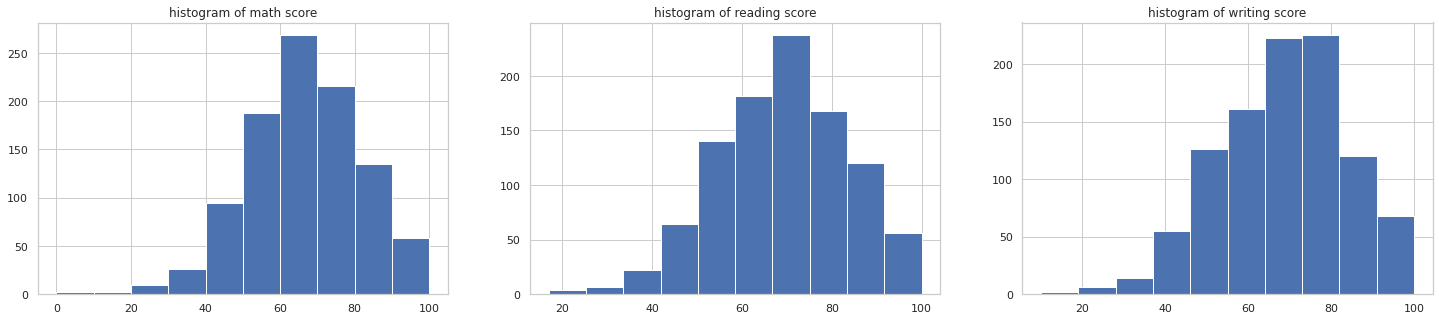

In [66]:
#1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
plt.hist(education_df["math score"])
plt.title("histogram of math score")

plt.subplot(1,3,2)
plt.hist(education_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(1,3,3)
plt.hist(education_df["writing score"])
plt.title("histogram of writing score")

They dont look normally distributed lets confirm with Jarque-Bera and Normal tests

In [67]:
jb_stats = jarque_bera(education_df["math score"])
norm_stats = normaltest(education_df["math score"])
print("Jarque-Bera test statistics is {0} and p value is {1} for math score".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1} for math score".format(norm_stats[0], norm_stats[1]),'\n')

jb_stats = jarque_bera(education_df["reading score"])
norm_stats = normaltest(education_df["reading score"])
print("Jarque-Bera test statistics is {0} and p value is {1} for reading score".format(jb_stats[0], jb_stats[1]),)
print("Normality test statistics is {0} and p value is {1} for reading score".format(norm_stats[0], norm_stats[1]),'\n')

jb_stats = jarque_bera(education_df["writing score"])
norm_stats = normaltest(education_df["writing score"])
print("Jarque-Bera test statistics is {0} and p value is {1} for writing score".format(jb_stats[0], jb_stats[1]),)
print("Normality test statistics is {0} and p value is {1} for writing score".format(norm_stats[0], norm_stats[1]),'\n')


Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213 for math score
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836 for math score 

Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448 for reading score
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582 for reading score 

Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527 for writing score
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974 for writing score 



They are not distributed normally. Jarque-Bera and Normal tests also confirm this

Text(0.5, 1.0, 'histogram of writing score (box-cox transformed)')

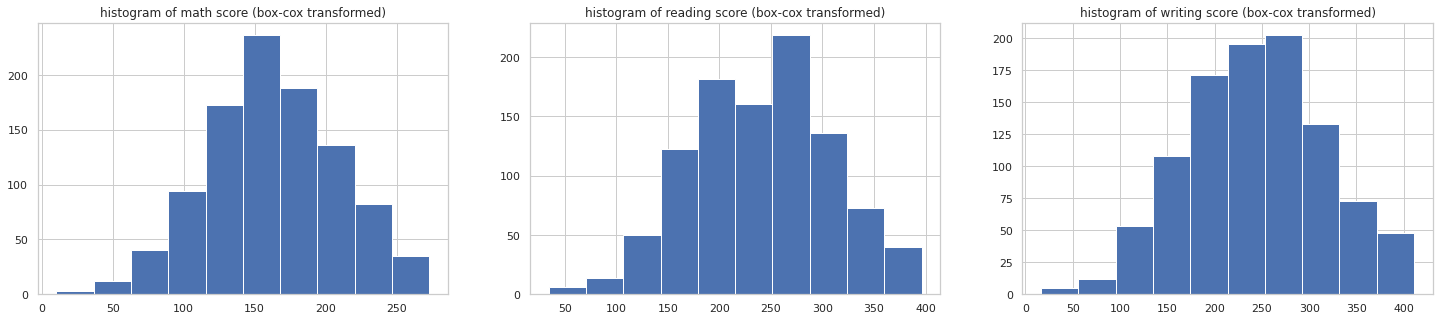

In [68]:
#lets apply Box-Cox transformation and see what changes

#there is an observation with math score is equal to 0 since box-cox transformation only works with positive data we are excluding it.

math_boxcox,_ = boxcox(education_df[education_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(education_df["reading score"])
writing_boxcox,_ = boxcox(education_df["writing score"])

plt.figure(figsize=(25,5))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

They look normally distributed lets confirm with Jarque-Bera and Normal tests

In [69]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1} for math score (box-cox transformed)".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1} for math score (box-cox transformed)".format(norm_stats[0], norm_stats[1]),'\n')

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1} for reading score".format(jb_stats[0], jb_stats[1]),)
print("Normality test statistics is {0} and p value is {1} for reading score (box-cox transformed)".format(norm_stats[0], norm_stats[1]),'\n')

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1} for writing score (box-cox transformed)".format(jb_stats[0], jb_stats[1]),)
print("Normality test statistics is {0} and p value is {1} for writing score (box-cox transformed)".format(norm_stats[0], norm_stats[1]),'\n')



Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327 for math score (box-cox transformed)
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686 for math score (box-cox transformed) 

Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408 for reading score
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971 for reading score (box-cox transformed) 

Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195 for writing score (box-cox transformed)
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712 for writing score (box-cox transformed) 



After we applied Box-Cox transformation, the distributions come closer to the normal distribution shape. The Jarque-Bera test also indicates that transformed variables are all normally distributed

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887 for exam score)
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478 for exam score) 



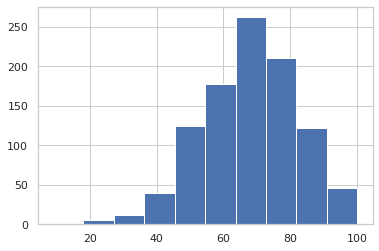

In [75]:
# 2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed.
exam_score = (education_df["math score"] + education_df["reading score"] + education_df["writing score"])/3

plt.hist(exam_score)

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)
print("Jarque-Bera test statistics is {0} and p value is {1} for exam score)".format(jb_stats[0], jb_stats[1]),)
print("Normality test statistics is {0} and p value is {1} for exam score)".format(norm_stats[0], norm_stats[1]),'\n')

The new variable is not normally distributed

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447 for exam score (box-cox transformed))
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724 for exam score (box-cox transformed)) 



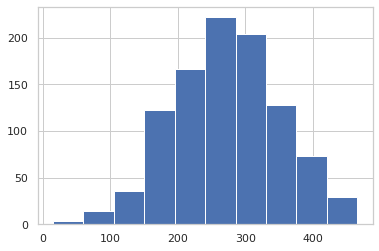

In [78]:
exam_boxcox,_ =boxcox(exam_score)
plt.hist(exam_boxcox)

jb_stats = jarque_bera(exam_boxcox)
norm_stats = normaltest(exam_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1} for exam score (box-cox transformed))".format(jb_stats[0], jb_stats[1]),)
print("Normality test statistics is {0} and p value is {1} for exam score (box-cox transformed))".format(norm_stats[0], norm_stats[1]),'\n')

After we applied Box-Cox transformation, the transformed variable is now normally distributed. Jarque-Bera and Normal tests also confirm this

([0, 1], <a list of 2 Text major ticklabel objects>)

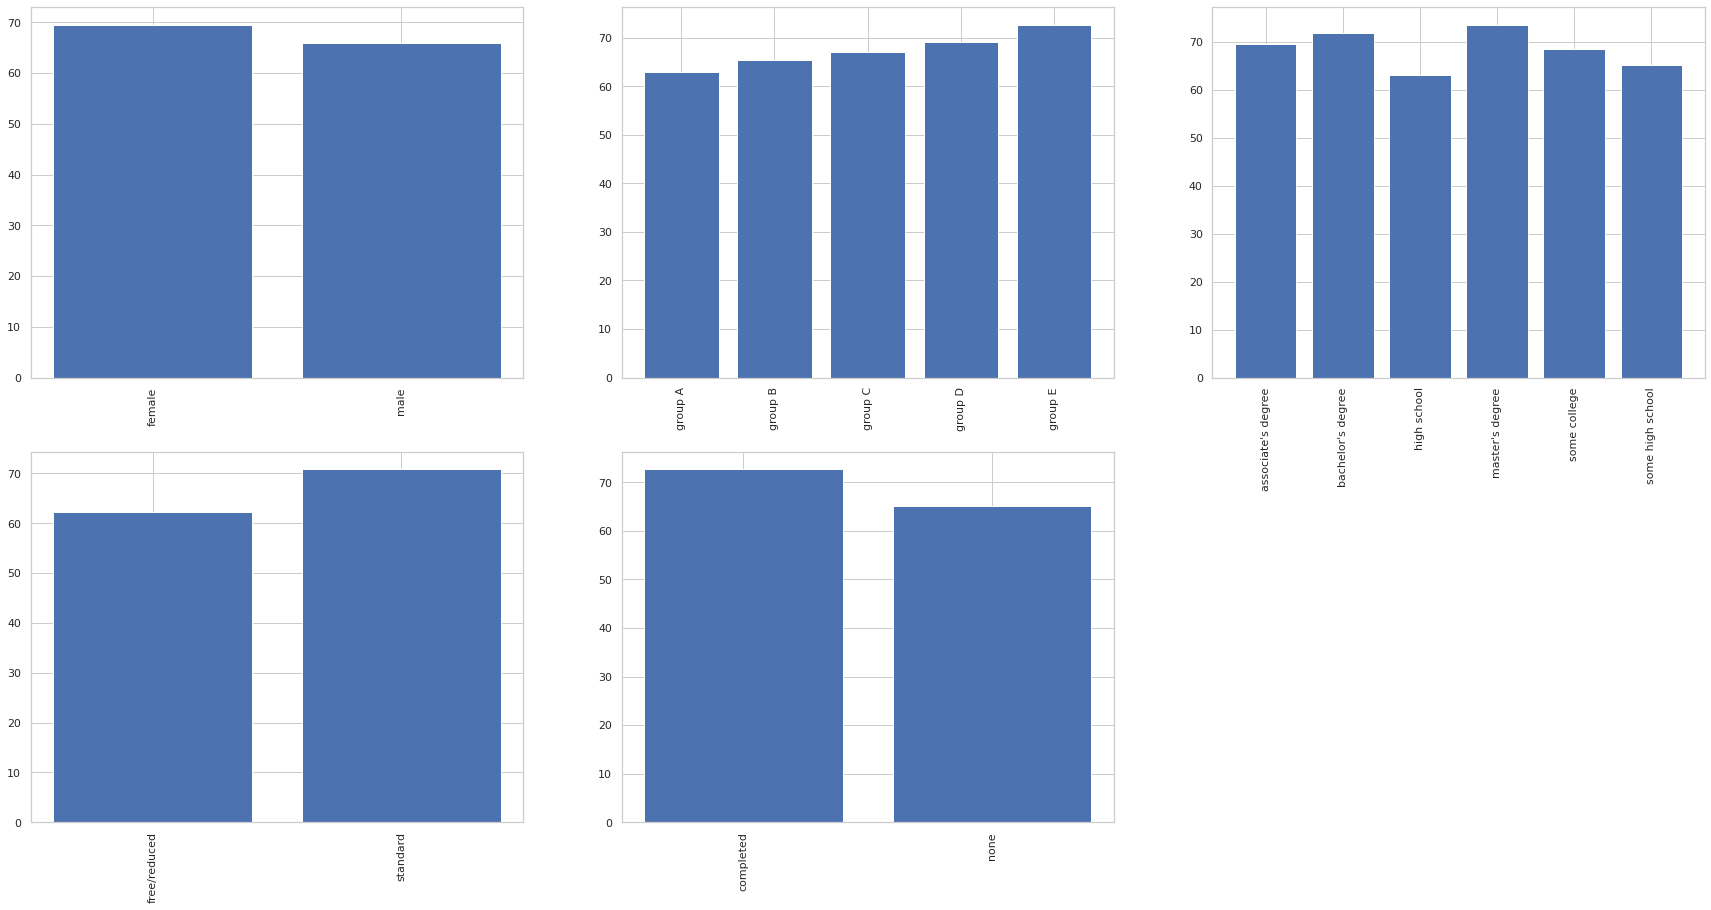

In [94]:
#3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?
education_df["exam_score"] = exam_score
education_df.head()
plt.figure(figsize=(30,15))

plt.subplot(2,3,1)
plt.bar(education_df.groupby("gender")["exam_score"].mean().index, education_df.groupby("gender")["exam_score"].mean())
plt.xticks(rotation="vertical")

plt.subplot(2,3,2)
plt.bar(education_df.groupby("race/ethnicity")["exam_score"].mean().index, education_df.groupby("race/ethnicity")["exam_score"].mean())
plt.xticks(rotation="vertical")

plt.subplot(2,3,3)
plt.bar(education_df.groupby("parental level of education")["exam_score"].mean().index, education_df.groupby("parental level of education")["exam_score"].mean())
plt.xticks(rotation="vertical")

plt.subplot(2,3,4)
plt.bar(education_df.groupby("lunch")["exam_score"].mean().index, education_df.groupby("lunch")["exam_score"].mean())
plt.xticks(rotation="vertical")

plt.subplot(2,3,5)
plt.bar(education_df.groupby("test preparation course")["exam_score"].mean().index, education_df.groupby("test preparation course")["exam_score"].mean())
plt.xticks(rotation="vertical")




1. Female students seem to be more successful than the males.

2. Average exam score increases from group A to group E. Hence race/ethnicity may play an important role in explaining the successes in the exams.

3. There is also some variation between the parental levels of education with respect to the exam scores.

4. Lunch type also exhibits variance in the average exam scores. But, this is probably not because of the lunch type itself but because of something that affects both the lunch type and the exam scores.

5. Those who completed the test preparation course seem to be more successful than the others.

Considering all these, all variables might be used in explaining the success in the exams but the lunch variable should be used precautiously.